<a href="https://colab.research.google.com/github/Iftekhar-mobin/TimeSeriesLSTM/blob/main/Multivariate_Multi_Step_Medium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference : https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

Reference : https://towardsdatascience.com/predictive-analytics-time-series-forecasting-with-gru-and-bilstm-in-tensorflow-87588c852915

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from pandas import DataFrame , concat
from sklearn.metrics import mean_absolute_error , mean_squared_error
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from numpy import mean , concatenate
from math import sqrt
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation
from numpy import array , hstack
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import save_model, load_model

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
training_file = 'H4_EURUSD_2015.csv'

In [3]:
df_h1 = pd.read_csv('H1_EURUSD_2015.csv',delimiter=',')
df_h4 = pd.read_csv(training_file,delimiter=',')
# df_D1 = pd.read_csv('D1_EURUSD_2015.csv',delimiter=',',index_col=0)
# df_m30 = pd.read_csv('M30_EURUSD_2015.csv',delimiter=',',index_col=0)


In [4]:
# Check for missing values
print(df_h1.isna().sum())

# Drop rows with missing values
df_h1 = df_h1.dropna()

Unnamed: 0     0
time           0
open           0
high           0
low            0
close          0
tick_volume    0
spread         0
real_volume    0
dtype: int64


In [5]:
df_h1.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close'} ,
             inplace = True)
df_h4.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close'} ,
             inplace = True)

In [6]:
df_h1

,Unnamed: 0,time,Open,High,Low,Close,tick_volume,spread,real_volume
0,0,1420048800,1.20997,1.21089,1.20966,1.20999,3237,17,0
1,1,1420185600,1.20481,1.20569,1.20479,1.20538,1254,17,0
2,2,1420189200,1.20537,1.20574,1.20341,1.20553,3394,17,0
3,3,1420192800,1.20556,1.20689,1.20442,1.20469,4590,17,0
4,4,1420196400,1.20468,1.20599,1.20380,1.20573,4335,17,0
...,...,...,...,...,...,...,...,...,...
58126,58126,1715367600,1.07713,1.07784,1.07685,1.07749,2374,18,0
58127,58127,1715371200,1.07748,1.07765,1.07722,1.07731,1346,18,0
58128,58128,1715374800,1.07730,1.07731,1.07688,1.07726,1911,18,0
58129,58129,1715378400,1.07725,1.07748,1.07707,1.07707,1872,18,0


In [7]:
df_h1['avg'] = df_h1.loc[:, ['Open', 'High', 'Low', 'Close']].mean(axis=1)

df_h4['avg'] = df_h4.loc[:, ['Open', 'High', 'Low', 'Close']].mean(axis=1)

In [8]:
df = pd.read_csv('GBPUSD1440.csv',delimiter=',')
df.columns =['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']

In [9]:
df = df[['Open', 'High', 'Low', 'Close']]

In [10]:
df['avg'] = df.loc[:, ['Open', 'High', 'Low', 'Close']].mean(axis=1)

In [11]:
df_h1

,Unnamed: 0,time,Open,High,Low,Close,tick_volume,spread,real_volume,avg
0,0,1420048800,1.20997,1.21089,1.20966,1.20999,3237,17,0,1.210128
1,1,1420185600,1.20481,1.20569,1.20479,1.20538,1254,17,0,1.205167
2,2,1420189200,1.20537,1.20574,1.20341,1.20553,3394,17,0,1.205013
3,3,1420192800,1.20556,1.20689,1.20442,1.20469,4590,17,0,1.205390
4,4,1420196400,1.20468,1.20599,1.20380,1.20573,4335,17,0,1.205050
...,...,...,...,...,...,...,...,...,...,...
58126,58126,1715367600,1.07713,1.07784,1.07685,1.07749,2374,18,0,1.077327
58127,58127,1715371200,1.07748,1.07765,1.07722,1.07731,1346,18,0,1.077415
58128,58128,1715374800,1.07730,1.07731,1.07688,1.07726,1911,18,0,1.077187
58129,58129,1715378400,1.07725,1.07748,1.07707,1.07707,1872,18,0,1.077217


In [12]:
df_h4

,Unnamed: 0,time,Open,High,Low,Close,tick_volume,spread,real_volume,avg
0,0,1420185600,1.20481,1.20689,1.20341,1.20573,13573,17,0,1.205210
1,1,1420200000,1.20573,1.20576,1.20248,1.20303,11302,17,0,1.204250
2,2,1420214400,1.20302,1.20329,1.20031,1.20090,16214,17,0,1.201880
3,3,1420228800,1.20093,1.20149,1.19993,1.20002,5820,17,0,1.200593
4,4,1420416000,1.19511,1.19754,1.18599,1.19539,15220,17,0,1.193507
...,...,...,...,...,...,...,...,...,...,...
14561,14561,1715313600,1.07783,1.07817,1.07721,1.07730,3353,18,0,1.077627
14562,14562,1715328000,1.07729,1.07858,1.07706,1.07797,8836,18,0,1.077725
14563,14563,1715342400,1.07800,1.07852,1.07653,1.07691,9909,18,0,1.077490
14564,14564,1715356800,1.07695,1.07891,1.07594,1.07749,14820,18,0,1.077322


In [17]:
dataset = df_h4

In [18]:
x_1 = dataset['Close']
x_2 = dataset['Open']
x_3 = dataset['High']
x_4 = dataset['Low']
y = dataset['avg']

x_1 = x_1.values
x_2 = x_2.values
x_3 = x_3.values
x_4 = x_4.values
y = y.values

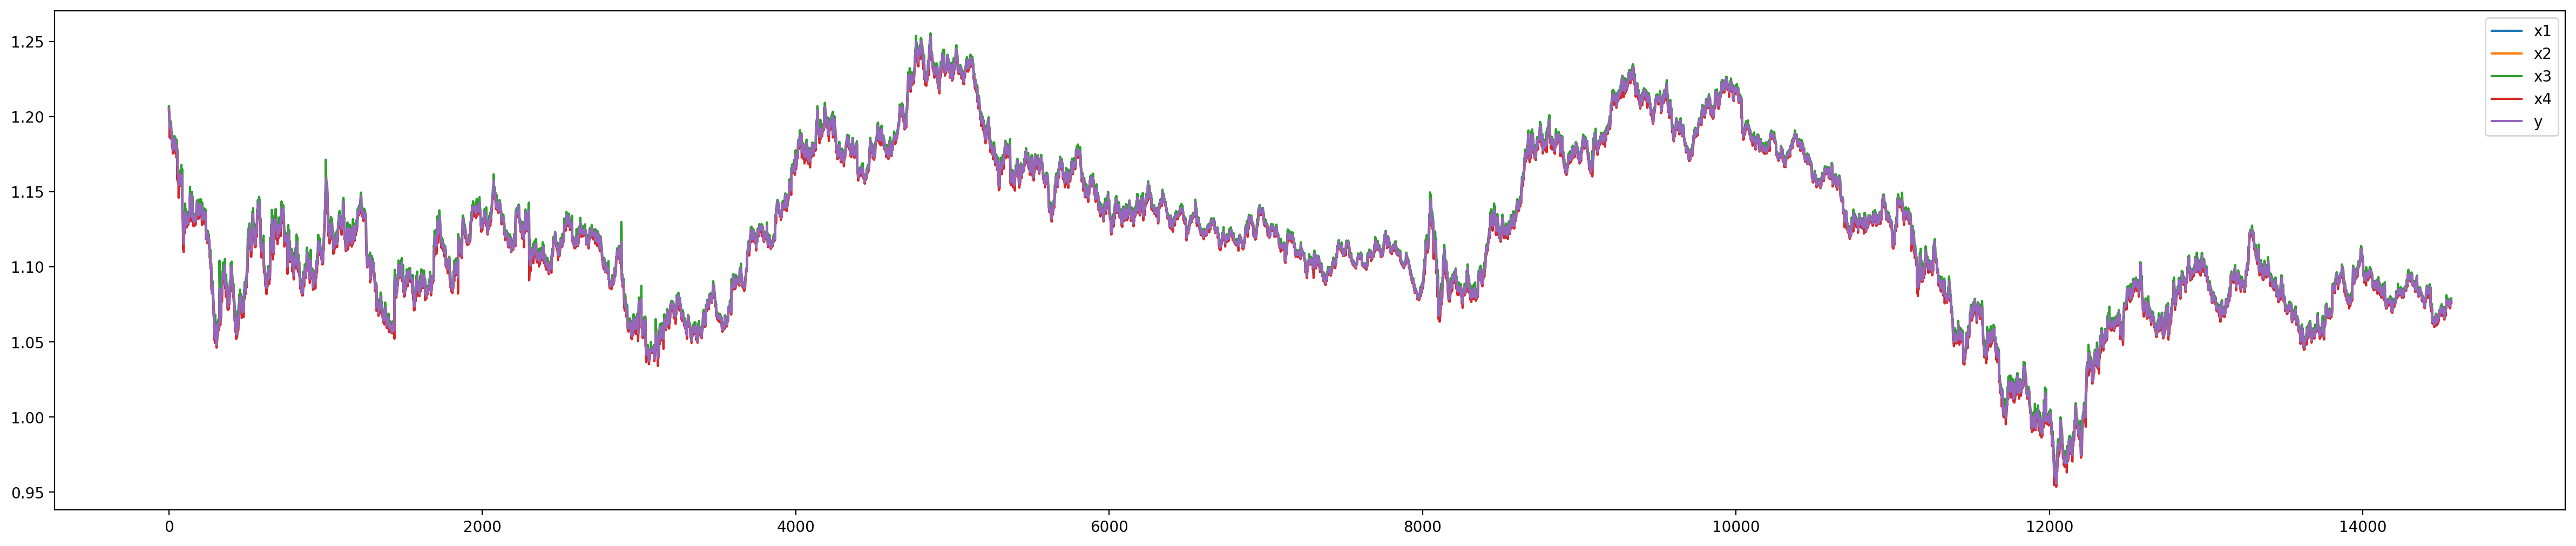

In [19]:
plt.figure(figsize=(30, 6))
plt.plot(x_1[:-1] , label='x1')
plt.plot(x_2[:-1] , label='x2')
plt.plot(x_3[:-1] , label='x3')
plt.plot(x_4[:-1] , label='x4')
plt.plot(y[:-1] , label='y')
plt.legend(loc='upper right')
# plt.title("Dataset" ,  fontsize=18)
# plt.xlabel('Time step' ,  fontsize=18)
# plt.ylabel('Values' , fontsize=18)
plt.legend()
plt.show()

In [20]:
# convert to [rows, columns] structure
x_1 = x_1.reshape((len(x_1), 1))
x_2 = x_2.reshape((len(x_2), 1))
x_3 = x_2.reshape((len(x_3), 1))
x_4 = x_2.reshape((len(x_4), 1))
y = y.reshape((len(y), 1))

print ("x_1.shape" , x_1.shape)
print ("x_2.shape" , x_2.shape)
print ("y.shape" , y.shape)

x_1.shape (14566, 1)
x_2.shape (14566, 1)
y.shape (14566, 1)


In [21]:
# normalization features
scaler = MinMaxScaler(feature_range=(0, 1))
x_1_scaled = scaler.fit_transform(x_1)
x_2_scaled = scaler.fit_transform(x_2)
x_3_scaled = scaler.fit_transform(x_3)
x_4_scaled = scaler.fit_transform(x_4)
y_scaled = scaler.fit_transform(y)

# horizontally stack columns
dataset_stacked = hstack((x_1_scaled, x_2_scaled, x_3_scaled, x_4_scaled, y_scaled))

print ("dataset_stacked.shape" , dataset_stacked.shape)

dataset_stacked.shape (14566, 5)


In [22]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


In [23]:
## choose a number of time steps #change this accordingly
n_steps_in, n_steps_out = 60 , 30

# covert into input/output
X, y = split_sequences(dataset_stacked, n_steps_in, n_steps_out)

print ("X.shape" , X.shape)
print ("y.shape" , y.shape)

split = int(len(X)*0.9)
train_X , train_y = X[:split, :] , y[:split, :]
test_X , test_y = X[split:, :] , y[split:, :]

n_features = train_X.shape[2]


print ("train_X.shape" , train_X.shape)
print ("train_y.shape" , train_y.shape)
print ("test_X.shape" , test_X.shape)
print ("test_y.shape" , test_y.shape)
print ("n_features" , n_features)

X.shape (14478, 60, 4)
y.shape (14478, 30)
train_X.shape (13030, 60, 4)
train_y.shape (13030, 30)
test_X.shape (1448, 60, 4)
test_y.shape (1448, 30)
n_features 4


**LSTM Model Parameter Setting**

In [24]:
#optimizer learning rate
# opt = keras.optimizers.Adam(learning_rate=0.01)

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(n_steps_out))
# model.add(Activation('linear'))
model.compile(loss='mse' , optimizer='adam' , metrics=['accuracy'])


In [25]:
model_name = training_file +'__'+ 'TS_model.h5'
model_name

'H4_EURUSD_2015.csv__TS_model.h5'

In [26]:

try:
    model = load_model(model_name)
except OSError as e:
    print("Model is not loaded, Training model now:", e)
    # Fit network
    history = model.fit(train_X, train_y , epochs=25,  
                        verbose=1,validation_data=(test_X, test_y), 
                        validation_split = 0.1, shuffle=False)
    model.save(model_name)
    

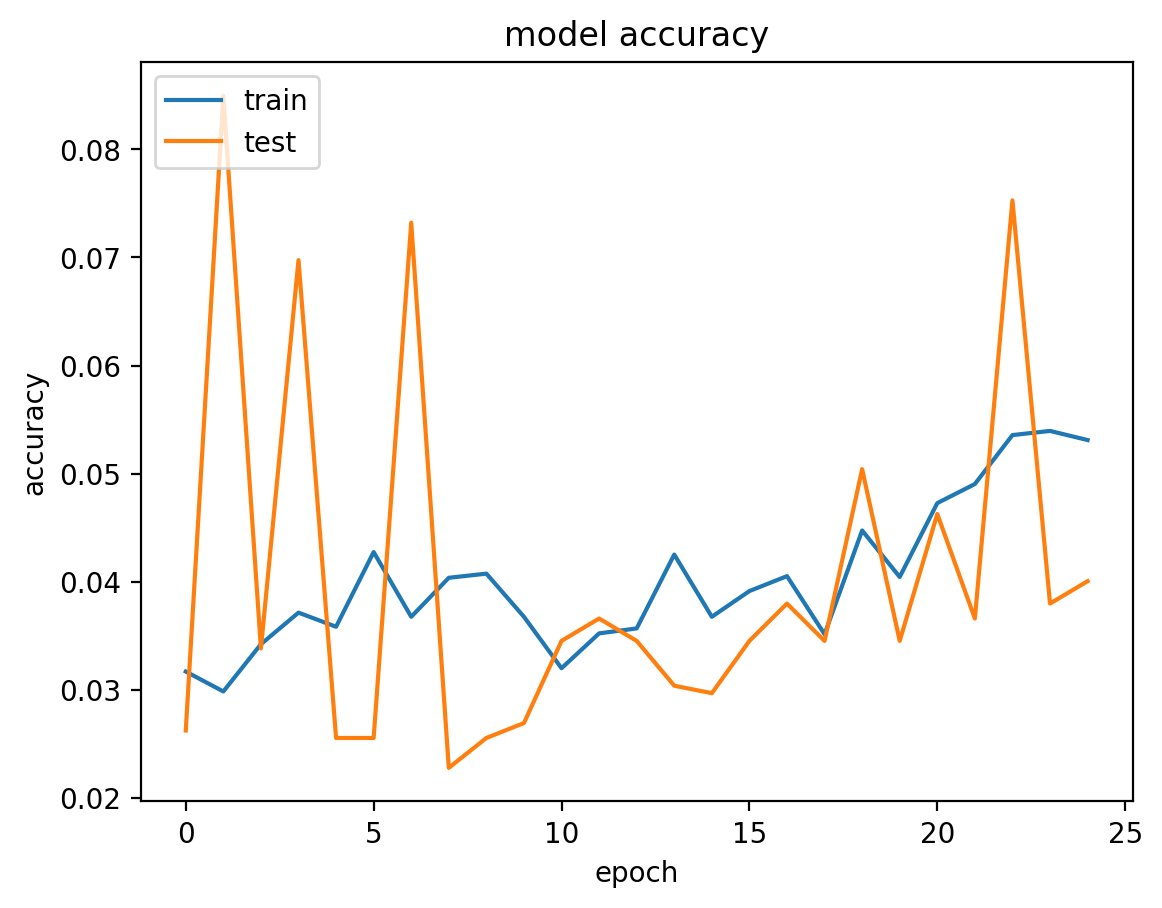

In [26]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

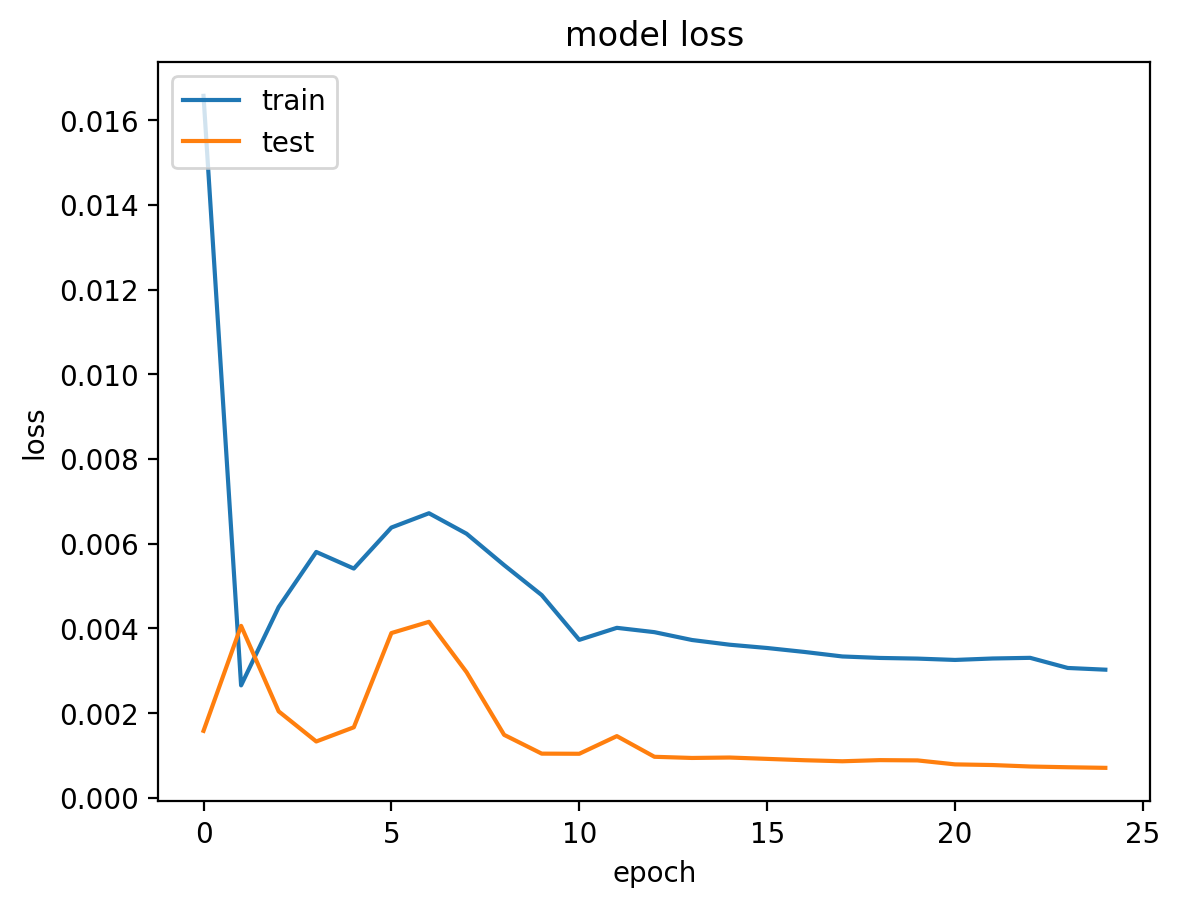

In [27]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
predicted_price = model.predict(test_X)

46/46 [==============================] - 1s 13ms/step


In [29]:
predicted_price.shape

(1448, 30)

In [30]:
# plt.plot(predicted_price[-1])
# plt.plot(test_y[-1])

collector = []
for i in range(len(predicted_price)):
#     print(predicted_price[i, -1:])
    collector.append(predicted_price[i, -1:])

pr_price_avg = np.average(predicted_price, axis=1)

In [31]:
predicted_30 = scaler.inverse_transform(collector[-30:]).reshape(-1)

In [32]:
last_100 = df_h4['Close'].values[-100:]

In [33]:
filler = np.empty_like(last_100)
filler[:] = np.nan
nan_plus_predicted_30 = np.concatenate((filler, predicted_30))

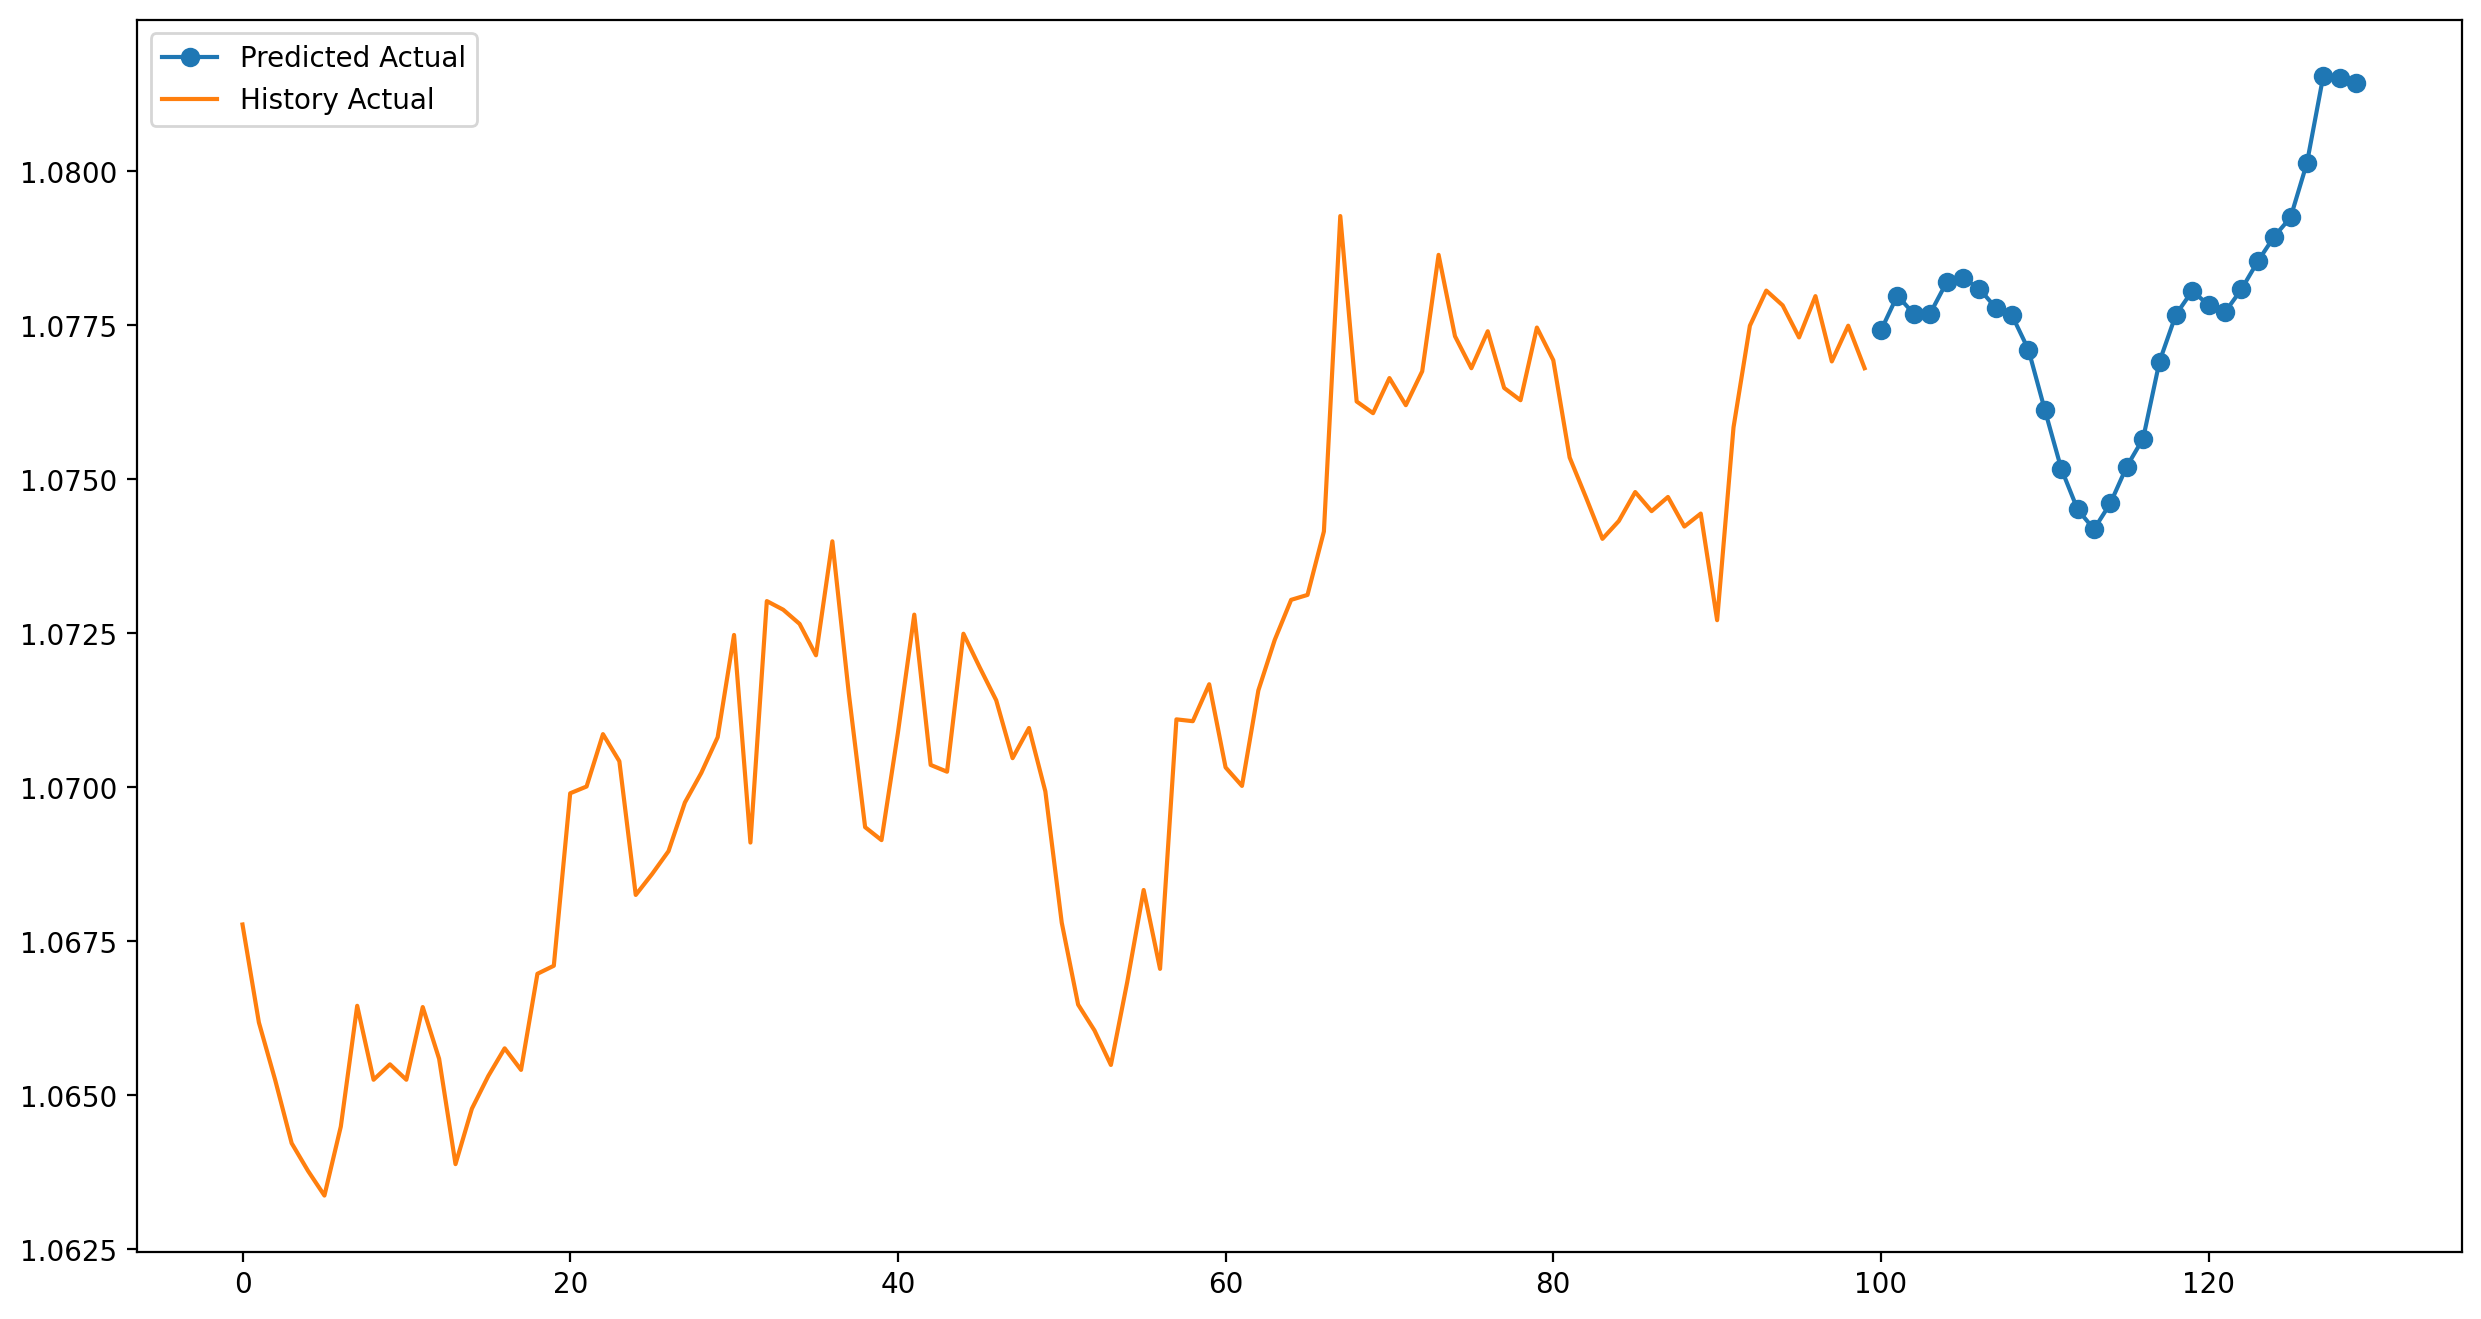

In [34]:
plt.figure(figsize=(15,8))
plt.plot(nan_plus_predicted_30, label='Predicted Actual', marker='o')
plt.plot(last_100, label='History Actual')
plt.legend()

In [41]:
predicted_prices = predicted_30

Change from index 0 to 1: -0.0016%
Change from index 1 to 7: 0.0003%
Change from index 7 to 10: -0.0012%
Change from index 10 to 11: 0.0012%
Change from index 11 to 12: -0.0008%
Change from index 12 to 15: -0.0003%
Change from index 15 to 24: 0.0029%
Change from index 24 to 26: 0.0007%
Change from index 26 to 31: 0.0001%
Change from index 31 to 32: 0.0039%
Change from index 32 to 37: -0.0015%
Change from index 37 to 40: -0.0007%
Change from index 40 to 42: -0.0005%
Change from index 42 to 44: 0.0021%
Change from index 44 to 46: -0.0011%
Change from index 46 to 55: -0.0031%
Change from index 55 to 56: -0.0013%
Change from index 56 to 57: 0.0040%
Change from index 57 to 61: -0.0011%
Change from index 61 to 62: 0.0015%
Change from index 62 to 75: 0.0052%
Change from index 75 to 76: 0.0006%
Change from index 76 to 77: -0.0009%
Change from index 77 to 79: 0.0010%
Change from index 79 to 80: -0.0005%
Change from index 80 to 91: -0.0011%
Change from index 91 to 97: 0.0011%
Change from index 9

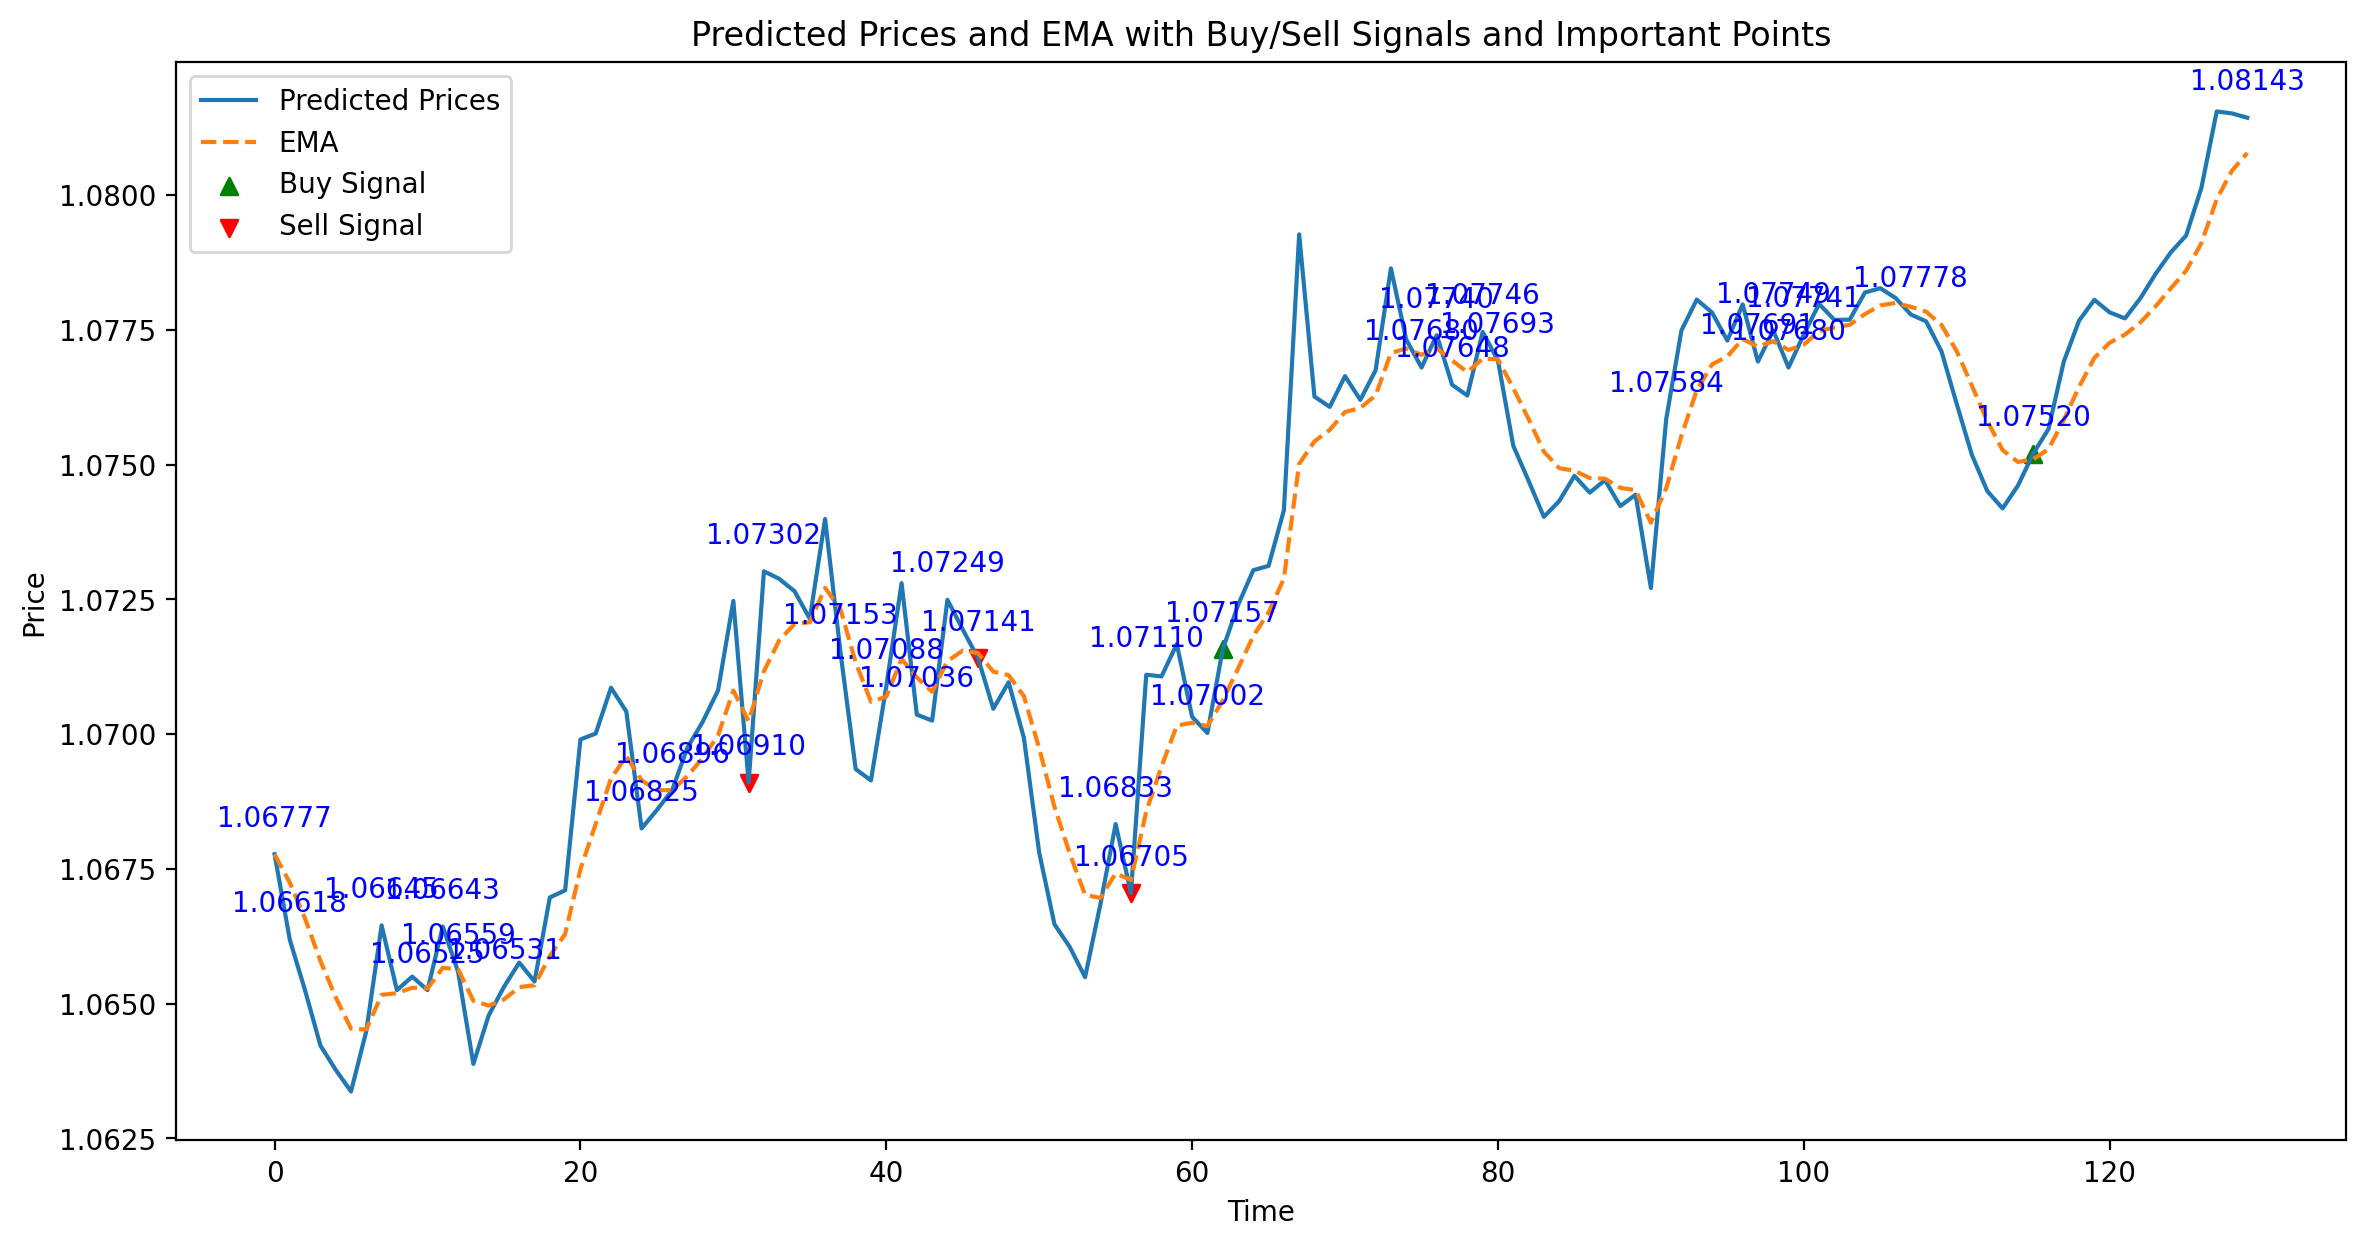

In [51]:
# Provided predicted price array
# predicted_prices = np.array([1.07741435, 1.07797974, 1.07768342, 1.07768771, 1.07819248,
#                              1.07827098, 1.07808965, 1.07778313, 1.07765595, 1.07710098,
#                              1.07612264, 1.07517155, 1.07450738, 1.07418625, 1.0746076,
#                              1.0752032, 1.07565877, 1.07690881, 1.07766963, 1.07805567,
#                              1.07782296, 1.07771129, 1.07808147, 1.07853602, 1.07893692,
#                              1.07924897, 1.08013435, 1.0815506, 1.08151388, 1.08143381])

# Define EMA parameters
n = 5  # Number of periods
alpha = 2 / (n + 1)

# Calculate EMA using np.convolve
ema = np.zeros_like(predicted_prices)
ema[0] = predicted_prices[0]  # First EMA value is the first price

for i in range(1, len(predicted_prices)):
    ema[i] = alpha * predicted_prices[i] + (1 - alpha) * ema[i-1]

# Initialize signals
signals = np.zeros(len(predicted_prices))

# Generate signals based on EMA crossover
for i in range(1, len(predicted_prices)):
    if predicted_prices[i] > ema[i] and predicted_prices[i-1] <= ema[i-1]:
        signals[i] = 1  # Buy signal
    elif predicted_prices[i] < ema[i] and predicted_prices[i-1] >= ema[i-1]:
        signals[i] = -1  # Sell signal
    else:
        signals[i] = 0  # Hold signal

# Print predicted prices at start, buy/sell signals, and end
start = 0
end = len(signals) - 1
important_points = []

for i in range(len(signals)):
    if i == start or i == end or signals[i] != 0:
        important_points.append((i, predicted_prices[i]))
#         print(f"Index: {i}, Price: {predicted_prices[i]:.5f}")

pip_change_max = 0.0030        
# Calculate and print percentage changes
for j in range(1, len(important_points)):
    index_prev, price_prev = important_points[j - 1]
    index_curr, price_curr = important_points[j]
#     percent_change = ((price_curr - price_prev) / price_prev) * 100
    pip_change = (price_curr - price_prev)
    print(f"Change from index {index_prev} to {index_curr}: {pip_change:.4f}%")
    
    if pip_change_max > abs(pip_change):
        signals[index_prev] = 0

    
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(predicted_prices, label='Predicted Prices')
plt.plot(ema, label='EMA', linestyle='--')
plt.scatter(np.arange(len(predicted_prices)), np.where(signals == 1, predicted_prices, np.nan), marker='^', color='g', label='Buy Signal')
plt.scatter(np.arange(len(predicted_prices)), np.where(signals == -1, predicted_prices, np.nan), marker='v', color='r', label='Sell Signal')

# Annotate the important points
for index, price in important_points:
    plt.annotate(f'{price:.5f}', (index, price),
                 textcoords="offset points", xytext=(0,10), ha='center', color='blue')

plt.legend()
plt.title('Predicted Prices and EMA with Buy/Sell Signals and Important Points')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()


In [48]:
total_signal = np.concatenate((last_100,predicted_30))

In [49]:
predicted_prices = total_signal

In [74]:
def calculate_ema(prices, span):
    return pd.Series(prices).ewm(span=span, adjust=False).mean().to_numpy()

short_ema_span = 3  # Example short-term EMA span
long_ema_span = 7  # Example long-term EMA span

short_ema = calculate_ema(predicted_prices, short_ema_span)
long_ema = calculate_ema(predicted_prices, long_ema_span)

In [75]:
def generate_signals(short_ema, long_ema, threshold=0.0002):
    signals = []
    for i in range(1, len(short_ema)):
        if short_ema[i] > long_ema[i] and short_ema[i-1] <= long_ema[i-1] and (short_ema[i] - long_ema[i]) >= threshold:
            signals.append('buy')
        elif short_ema[i] < long_ema[i] and short_ema[i-1] >= long_ema[i-1] and (long_ema[i] - short_ema[i]) >= threshold:
            signals.append('sell')
        else:
            signals.append('hold')
    signals.insert(0, 'hold')  # No signal for the first data point
    return signals

signals = generate_signals(short_ema, long_ema)


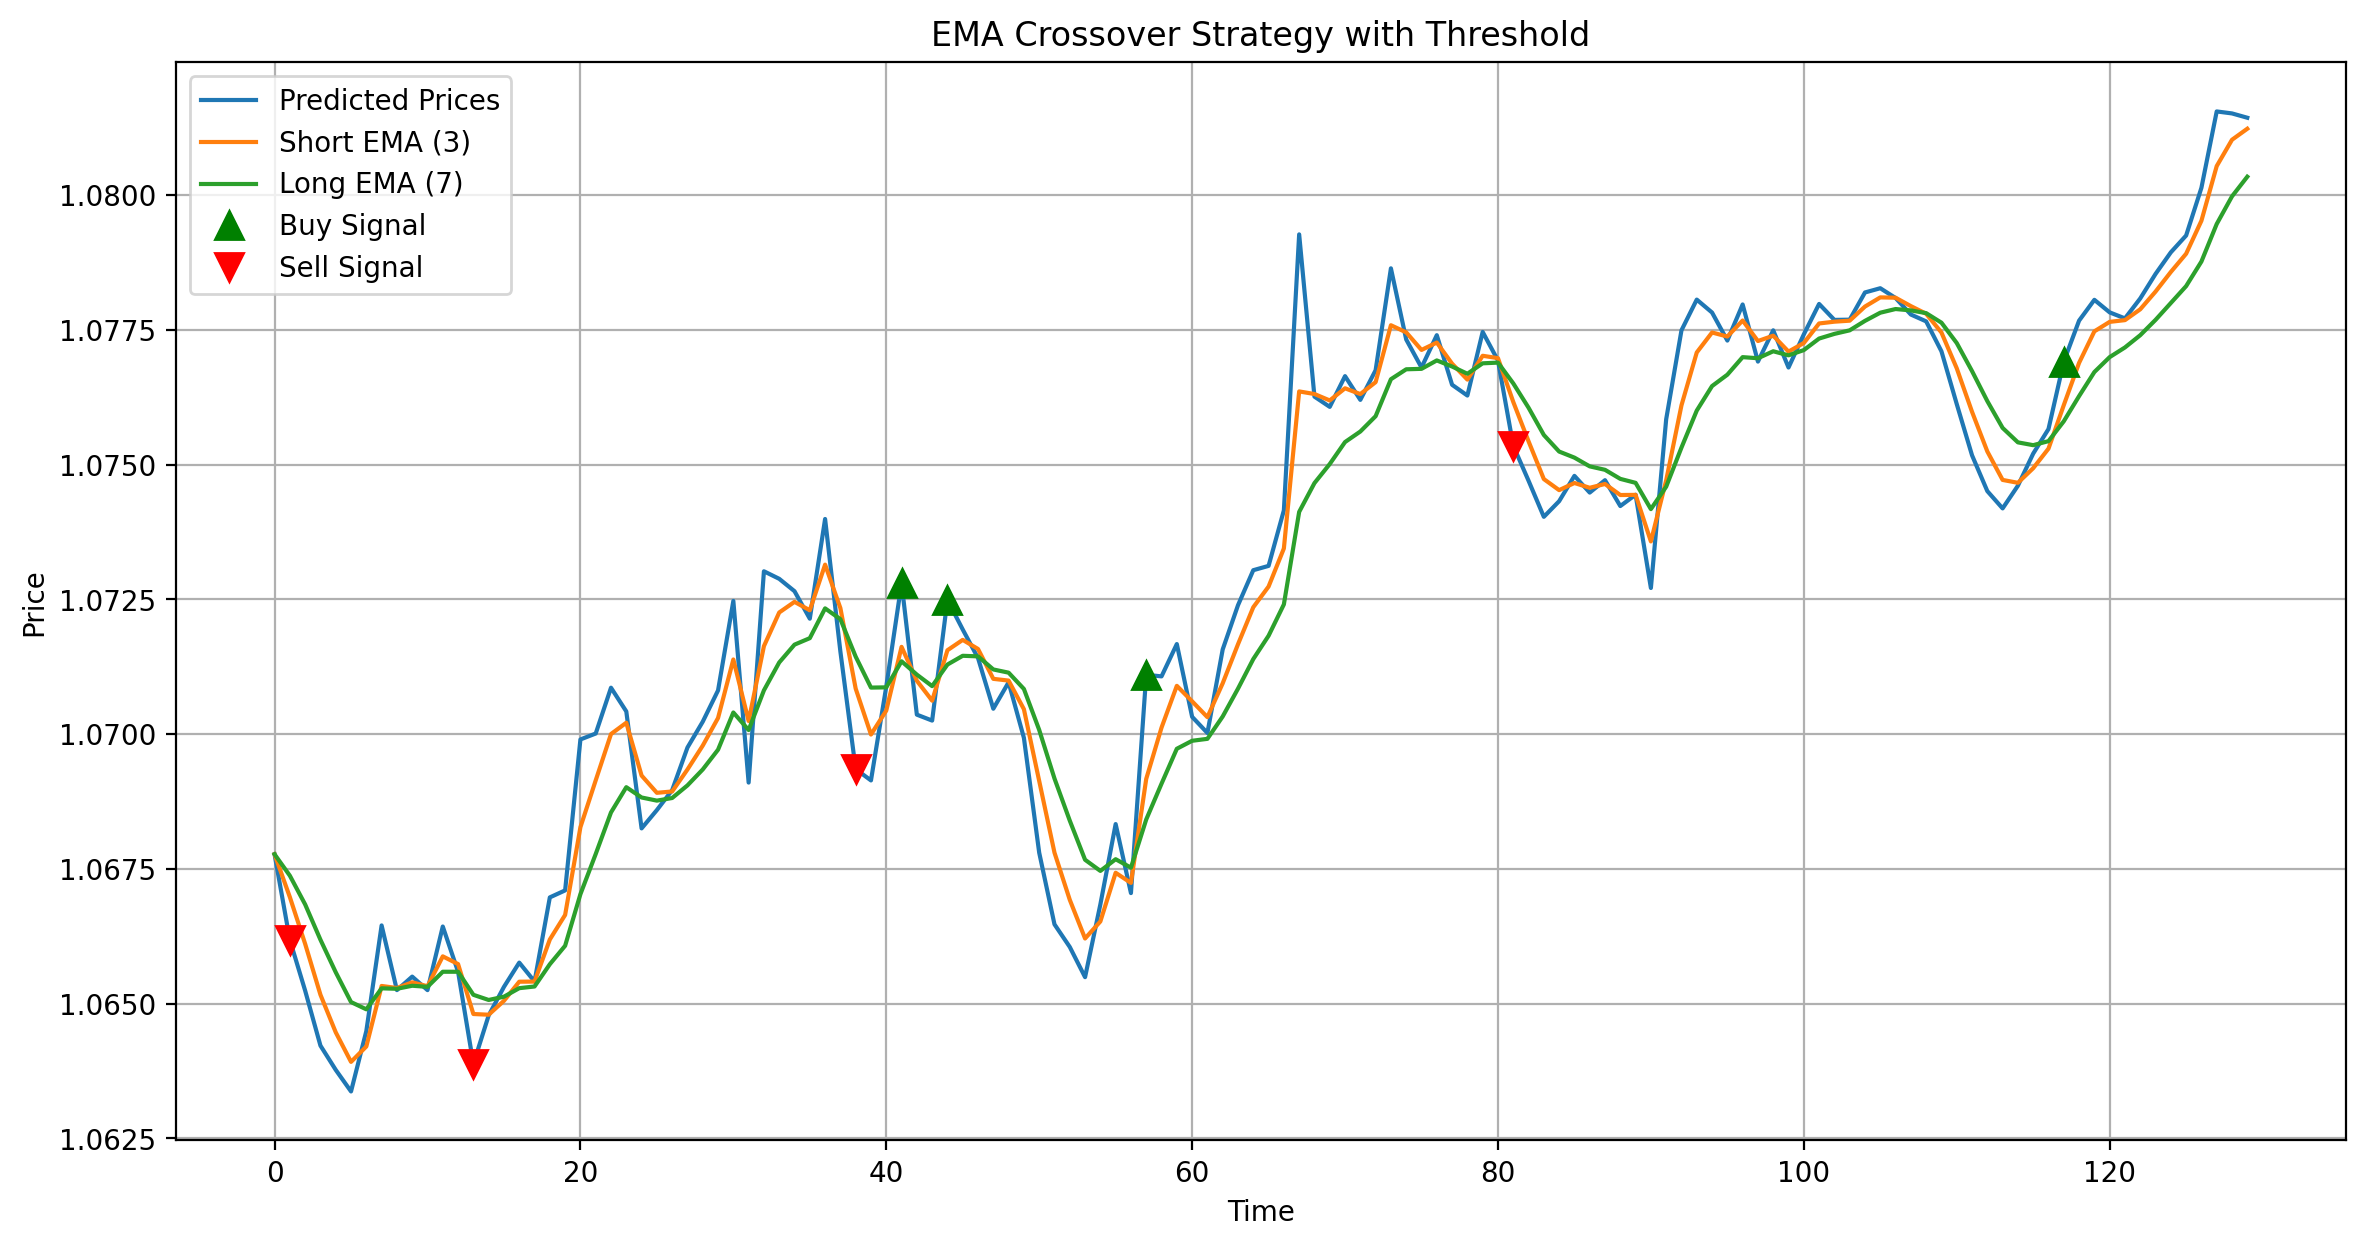

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(predicted_prices, label='Predicted Prices')
plt.plot(short_ema, label=f'Short EMA ({short_ema_span})')
plt.plot(long_ema, label=f'Long EMA ({long_ema_span})')
buy_signals = [predicted_prices[i] if signal == 'buy' else np.nan for i, signal in enumerate(signals)]
sell_signals = [predicted_prices[i] if signal == 'sell' else np.nan for i, signal in enumerate(signals)]
plt.plot(buy_signals, 'g^', markersize=10, label='Buy Signal')
plt.plot(sell_signals, 'rv', markersize=10, label='Sell Signal')
plt.legend()
plt.title('EMA Crossover Strategy with Threshold')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid()
plt.show()


In [77]:
signals

['hold',
 'sell',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'sell',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'sell',
 'hold',
 'hold',
 'buy',
 'hold',
 'hold',
 'buy',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'buy',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'sell',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'ho

In [ ]:
import MetaTrader5 as mt5
import pandas as pd

# Initialize the MT5 connection
mt5.initialize()

# Define your symbols and other constants
symbol = "EURUSD"
sl_distance = 30  # Stop loss distance in pips
tp_distance = 100  # Take profit distance in pips
breakeven_distance = 50  # Profit distance in pips to move SL to breakeven

# Ensure you have the predicted_prices and ema lists ready
predicted_prices = [...]  # Your predicted prices
ema = [...]  # Your EMA values

# Initialize signals array
signals = [0] * len(predicted_prices)

# Function to send a buy order
def send_buy_order():
    point = mt5.symbol_info(symbol).point
    price = mt5.symbol_info_tick(symbol).ask
    sl = price - sl_distance * point
    tp = price + tp_distance * point
    request = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": symbol,
        "volume": 0.1,
        "type": mt5.ORDER_TYPE_BUY,
        "price": price,
        "sl": sl,
        "tp": tp,
        "deviation": 20,
        "magic": 234000,
        "comment": "EMA Buy Signal",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_RETURN,
    }
    result = mt5.order_send(request)
    return result

# Function to send a sell order
def send_sell_order():
    point = mt5.symbol_info(symbol).point
    price = mt5.symbol_info_tick(symbol).bid
    sl = price + sl_distance * point
    tp = price - tp_distance * point
    request = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": symbol,
        "volume": 0.1,
        "type": mt5.ORDER_TYPE_SELL,
        "price": price,
        "sl": sl,
        "tp": tp,
        "deviation": 20,
        "magic": 234000,
        "comment": "EMA Sell Signal",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_RETURN,
    }
    result = mt5.order_send(request)
    return result

        
# Main loop to generate signals and send orders
for i in range(1, len(predicted_prices)):
    # Check for existing open orders
    open_orders = mt5.positions_total()
    if open_orders > 0:
        signals[i] = 0  # Hold signal if there are already open orders
        continue        
    if predicted_prices[i] > ema[i] and predicted_prices[i-1] <= ema[i-1]:
        signals[i] = 1  # Buy signal
        send_buy_order()  # Send MT5 buy order
    elif predicted_prices[i] < ema[i] and predicted_prices[i-1] >= ema[i-1]:
        signals[i] = -1  # Sell signal
        send_sell_order()  # Send MT5 sell order
    else:
        signals[i] = 0  # Hold signal

# Function to move SL to breakeven
def move_sl_to_breakeven(order, breakeven_price):
    request = {
        "action": mt5.TRADE_ACTION_SLTP,
        "symbol": order.symbol,
        "order": order.ticket,
        "sl": breakeven_price,
        "tp": order.tp,
        "deviation": 20,
        "magic": order.magic,
        "comment": "Move SL to Breakeven",
    }
    result = mt5.order_send(request)
    return result

# Function to check and adjust stop loss
def check_and_adjust_sl():
    orders = mt5.positions_get(symbol=symbol)
    for order in orders:
        point = mt5.symbol_info(symbol).point
        current_price = mt5.symbol_info_tick(symbol).bid if order.type == mt5.ORDER_TYPE_BUY \ 
                                                            else mt5.symbol_info_tick(symbol).ask
        entry_price = order.price_open
        if order.type == mt5.ORDER_TYPE_BUY:
            if current_price - entry_price >= breakeven_distance * point:
                move_sl_to_breakeven(order, entry_price)
        elif order.type == mt5.ORDER_TYPE_SELL:
            if entry_price - current_price >= breakeven_distance * point:
                move_sl_to_breakeven(order, entry_price)

# Periodically check and adjust stop loss
while True:
    check_and_adjust_sl()
    time.sleep(60)  # Check every minute

# Shutdown MT5 connection
mt5.shutdown()


In [37]:
predicted_30

array([1.07741435, 1.07797974, 1.07768342, 1.07768771, 1.07819248,
       1.07827098, 1.07808965, 1.07778313, 1.07765595, 1.07710098,
       1.07612264, 1.07517155, 1.07450738, 1.07418625, 1.0746076 ,
       1.0752032 , 1.07565877, 1.07690881, 1.07766963, 1.07805567,
       1.07782296, 1.07771129, 1.07808147, 1.07853602, 1.07893692,
       1.07924897, 1.08013435, 1.0815506 , 1.08151388, 1.08143381])

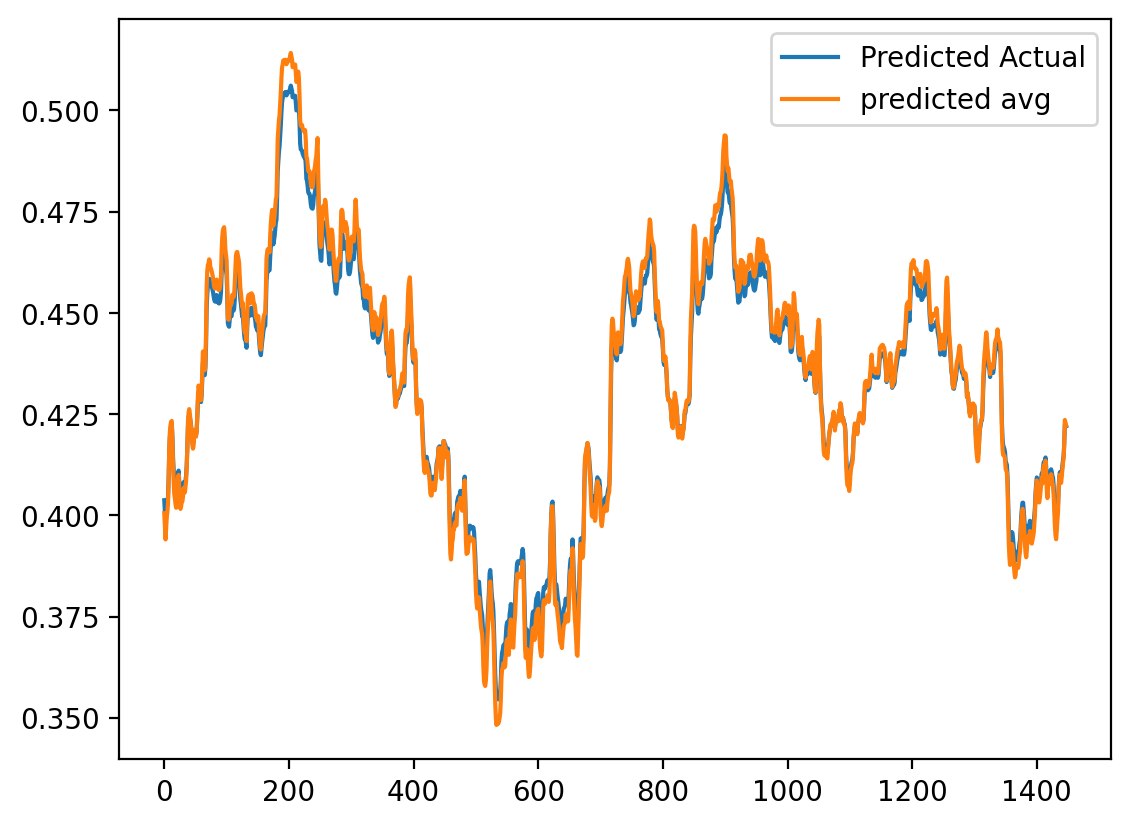

In [35]:
plt.plot(collector, label='Predicted Actual')
plt.plot(pr_price_avg, label='predicted avg')
plt.legend()

In [36]:
filler = np.ones((test_y.shape[1]))
filler[:] = np.nan
ac_avg_filler = np.concatenate((filler, np.average(test_y, axis=1)))


test_y_avg = np.average(test_y, axis=1)
test_y_avg[-n_steps_out:] = np.nan
ac_avg_filler_minus = test_y_avg    

### Evaluate the model

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
# Check for NaN values in the arrays
print("NaN in test_y:", np.isnan(np.average(test_y, axis=1)).sum())
print("NaN in ac_avg_filler_minus:", np.isnan(pr_price_avg).sum())

NaN in test_y: 0
NaN in ac_avg_filler_minus: 0


In [68]:
mse = mean_squared_error(np.average(test_y, axis=1), pr_price_avg)
r2 = r2_score(np.average(test_y, axis=1), pr_price_avg)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.0005384003907558603
R^2 Score: 0.7758740731549448


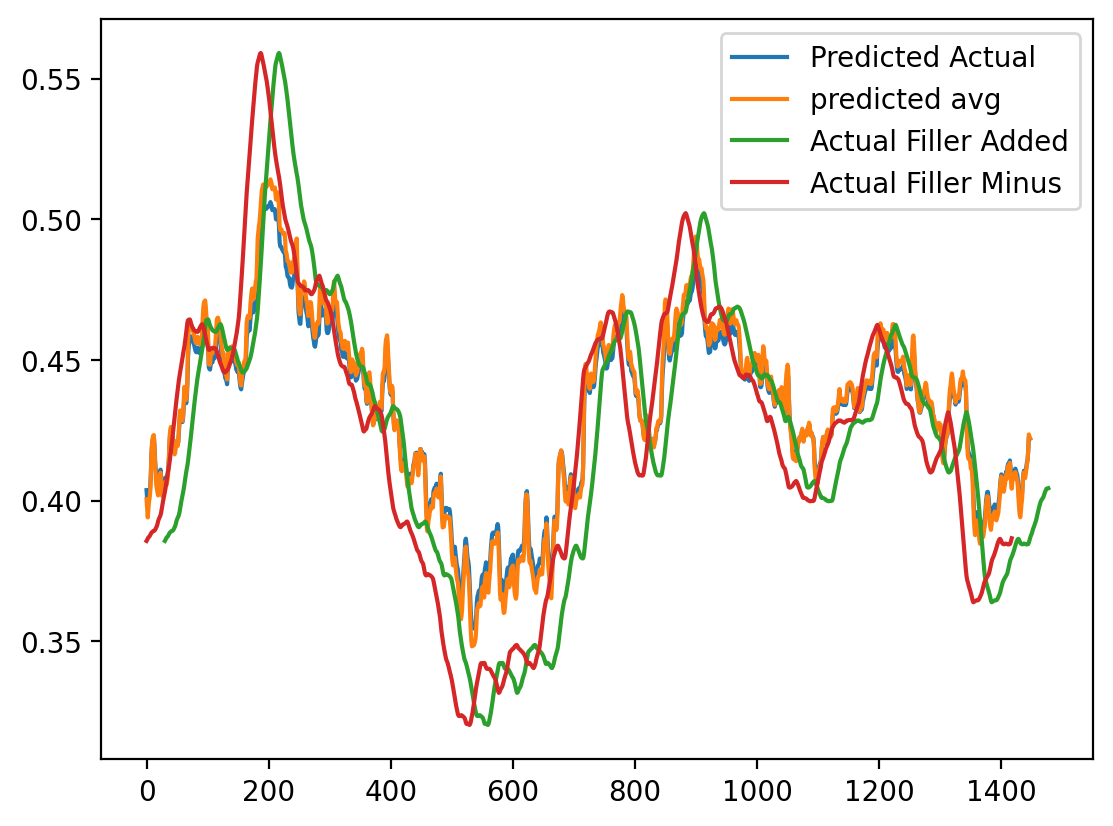

In [32]:
plt.plot(collector, label='Predicted Actual')
plt.plot(pr_price_avg, label='predicted avg')
plt.plot(ac_avg_filler, label = 'Actual Filler Added')
plt.plot(ac_avg_filler_minus, label = 'Actual Filler Minus')
plt.legend()
plt.show()

In [33]:
pr_price_avg_df = pd.DataFrame(pr_price_avg.reshape(-1,1), columns=['prediction'])

In [34]:
pr_price_avg_df

,prediction
0,0.400530
1,0.397502
2,0.394057
3,0.396973
4,0.399626
...,...
1443,0.414111
1444,0.417747
1445,0.423559
1446,0.422938


In [35]:
def generate_ema(dataframe, ema_span, col_name):
    ema_col = 'EWMA'+ str(ema_span)
    dataframe[ema_col] = dataframe[col_name].ewm(span=ema_span, adjust=False).mean()
    return dataframe

In [298]:
# Define periods for short and long moving averages
short_period = 2
long_period = 10

In [299]:
pr_price_avg_df = generate_ema(pr_price_avg_df, short_period, 'prediction')
pr_price_avg_df = generate_ema(pr_price_avg_df, long_period, 'prediction')

In [300]:
threshold = 0.002
# pr_price_avg_df['Signal'] = np.where((pr_price_avg_df['EWMA2'] - 
#                                      pr_price_avg_df['EWMA3']) > threshold, 
#                                      1, 0)
# pr_price_avg_df['Signal'] = np.where((pr_price_avg_df['EWMA2'] - 
#                                      pr_price_avg_df['EWMA3']) < -threshold, 
#                                      -1, pr_price_avg_df['Signal'])

pr_price_avg_df['Signal'] = np.where(pr_price_avg_df['EWMA2']>pr_price_avg_df['EWMA3'],1,-1)

# Calculate the percentage change between consecutive rows
pr_price_avg_df['pct_change'] = abs(pr_price_avg_df['prediction'].pct_change())

In [301]:
threshold_percentage_change = 0.002

flag=1
for i in range(0, len(pr_price_avg_df)-1):
    if abs(pr_price_avg_df.at[i, 'pct_change'] + abs(pr_price_avg_df.at[i+1, 'pct_change'])) \
        < threshold_percentage_change:
        pr_price_avg_df.at[i, 'Signal']==0
        
    if pr_price_avg_df.at[i, 'Signal']==1 and pr_price_avg_df.at[i+1, 'Signal']==1 and flag==1:
        flag=-1
    elif pr_price_avg_df.at[i, 'Signal']==1 and pr_price_avg_df.at[i+1, 'Signal']==1 and flag==-1:
        pr_price_avg_df.at[i, 'Signal'] = 0
    elif pr_price_avg_df.at[i, 'Signal']==-1 and pr_price_avg_df.at[i+1, 'Signal']==-1 and flag==1:
        flag=-1
    elif pr_price_avg_df.at[i, 'Signal']==-1 and pr_price_avg_df.at[i+1, 'Signal']==-1 and flag==-1:
        pr_price_avg_df.at[i, 'Signal'] = 0
    elif (pr_price_avg_df.at[i, 'Signal']==-1 and pr_price_avg_df.at[i+1, 'Signal']==1):
        pr_price_avg_df.at[i, 'Signal'] = 0
        pr_price_avg_df.at[i+1, 'Signal'] = 0
        pr_price_avg_df.at[i+2, 'Signal'] = 1
    elif pr_price_avg_df.at[i, 'Signal']==1 and pr_price_avg_df.at[i+1, 'Signal']==-1:
        pr_price_avg_df.at[i, 'Signal'] = 0
        pr_price_avg_df.at[i+1, 'Signal'] = 0
        pr_price_avg_df.at[i+2, 'Signal'] = -1
    else:
        flag=1



In [302]:
pr_price_avg_df

,prediction,EWMA2,EWMA3,Signal,pct_change,Cash,Holdings,Portfolio_Value,Close,Returns,Strategy_Returns,Cumulative_Strategy_Returns,EWMA10
0,0.400530,0.400530,0.400530,-1,NaN,100000.0,0.0,100000.0,1.20573,NaN,NaN,0.0,0.400530
1,0.397502,0.398512,0.399016,0,0.007560,100000.0,0.0,100000.0,1.20303,-0.002239,0.0,0.0,0.399980
2,0.394057,0.395542,0.396537,0,0.008667,100000.0,0.0,100000.0,1.20090,-0.001771,0.0,0.0,0.398903
3,0.396973,0.396496,0.396755,0,0.007399,100000.0,0.0,100000.0,1.20002,-0.000733,0.0,0.0,0.398552
4,0.399626,0.398582,0.398190,0,0.006683,100000.0,0.0,100000.0,1.19539,-0.003858,0.0,0.0,0.398747
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,0.414111,0.413468,0.412823,0,0.002800,0.0,0.0,0.0,1.09381,0.002668,0.0,-1.0,0.409268
1444,0.417747,0.416320,0.415285,0,0.008779,0.0,0.0,0.0,1.08892,-0.004471,0.0,-1.0,0.410810
1445,0.423559,0.421146,0.419422,0,0.013913,0.0,0.0,0.0,1.09252,0.003306,0.0,-1.0,0.413128
1446,0.422938,0.422341,0.421180,0,0.001466,0.0,0.0,0.0,1.08677,-0.005263,0.0,-1.0,0.414911


In [303]:
signal_index = pr_price_avg_df[(pr_price_avg_df['Signal']==1) | (pr_price_avg_df['Signal']==-1)]
signal_index = signal_index.reset_index()

In [42]:
signal_index

,index,prediction,EWMA2,EWMA3,Signal,pct_change
0,0,0.400530,0.400530,0.400530,-1,NaN
1,5,0.400846,0.400092,0.399518,1,0.003054
2,14,0.412593,0.415145,0.416568,-1,0.014975
3,21,0.407622,0.406534,0.405961,1,0.005702
4,25,0.402006,0.403812,0.404812,-1,0.010816
...,...,...,...,...,...,...
171,1416,0.406378,0.408026,0.408994,-1,0.009836
172,1420,0.407718,0.407851,0.407773,1,0.003311
173,1426,0.407427,0.407766,0.408044,-1,0.001236
174,1434,0.400648,0.399684,0.399035,1,0.004702


In [304]:
for i in range(len(signal_index)-1):
    if (signal_index.loc[i+1, 'index'] - signal_index.loc[i, 'index']) < 8:
        pr_price_avg_df.at[signal_index.loc[i, 'index'], 'Signal']=0
        print(i, signal_index.loc[i+1, 'index'] , signal_index.loc[i, 'index'])

0 5 0
2 21 14
3 25 21
4 30 25
6 49 43
7 54 49
8 61 54
9 68 61
10 75 68
12 91 87
17 141 134
18 144 141
20 158 154
23 206 199
27 254 248
28 261 254
29 268 261
30 271 268
33 293 288
34 300 293
35 307 300
36 310 307
38 332 325
40 347 340
42 363 356
43 368 363
44 375 368
48 414 410
51 436 431
53 448 444
54 453 448
55 458 453
56 464 458
58 481 478
59 484 481
60 490 484
61 497 490
67 559 556
68 562 559
72 602 597
73 608 602
75 625 620
79 665 658
82 700 694
83 705 700
86 728 724
87 732 728
88 735 732
91 763 757
95 823 818
97 834 831
99 860 854
101 878 872
104 931 925
105 934 931
107 950 943
108 956 950
109 959 956
110 962 959
111 969 962
113 987 983
114 990 987
116 1005 999
117 1009 1005
118 1014 1009
120 1032 1025
121 1038 1032
122 1043 1038
123 1047 1043
124 1053 1047
127 1084 1079
128 1088 1084
131 1119 1114
132 1124 1119
134 1138 1132
135 1143 1138
136 1148 1143
137 1155 1148
138 1162 1155
139 1167 1162
140 1173 1167
143 1205 1199
145 1219 1215
146 1226 1219
148 1241 1236
150 1254 1249
151

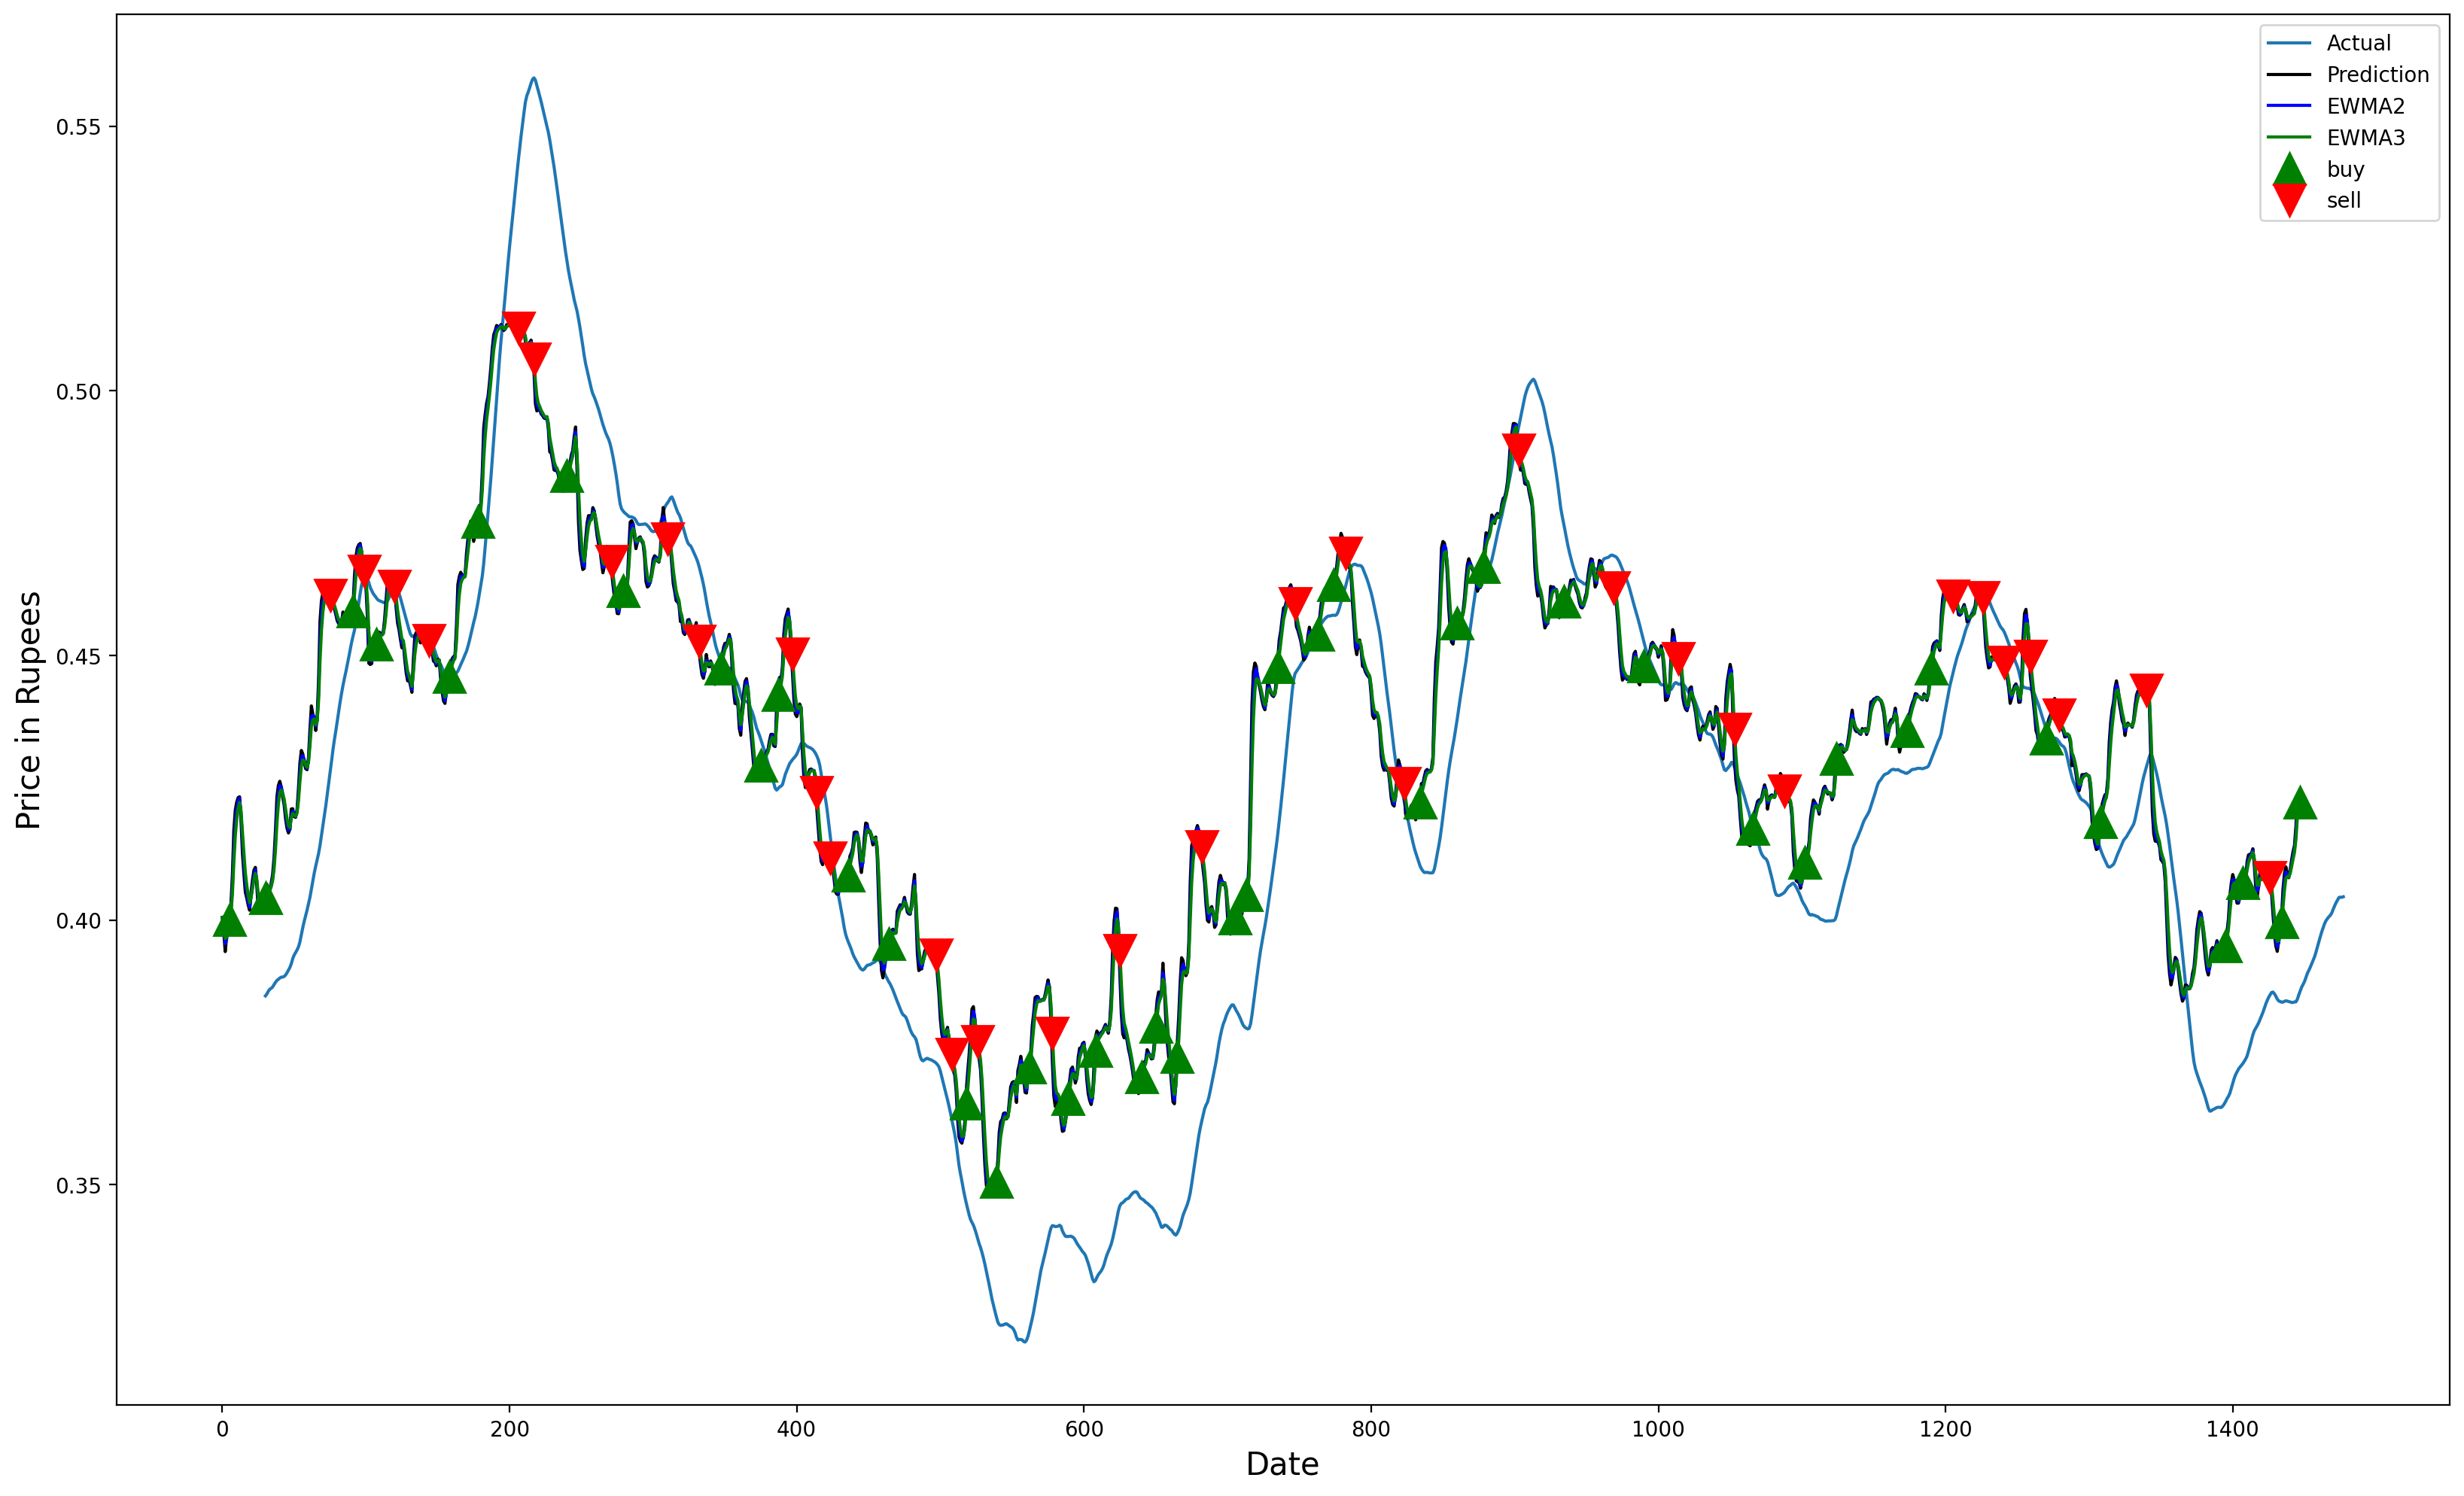

In [305]:
plt.figure(figsize = (20,12))

plt.plot(ac_avg_filler, label = 'Actual')

# plot close price, short-term and long-term moving averages 
pr_price_avg_df['prediction'].plot(color = 'k', label= 'Prediction') 
pr_price_avg_df['EWMA2'].plot(color = 'b',label = 'EWMA2') 
pr_price_avg_df['EWMA3'].plot(color = 'g', label = 'EWMA3')
# plot ‘buy’ signals
plt.plot(pr_price_avg_df[pr_price_avg_df['Signal'] == 1].index, 
         pr_price_avg_df['EWMA2'][pr_price_avg_df['Signal'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(pr_price_avg_df[pr_price_avg_df['Signal'] == -1].index, 
         pr_price_avg_df['EWMA3'][pr_price_avg_df['Signal'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.legend()
plt.show()

Evaluation



In [73]:
# Test Data Batch 1 , Test Data Batch 2 , Test Data Batch 3
url_test = 'H4_EURUSD.csv'
dataset_test_ok = pd.read_csv(url_test, usecols=['open', 'high', 'low', 'close'])
dataset_test_ok = dataset_test_ok.iloc[:500, :]
dataset_test_ok['avg'] = dataset_test_ok.iloc[:,0:-1].mean(axis=1)
dataset_test_ok.head()

,open,high,low,close,avg
0,1.0088,1.0106,1.0061,1.0062,1.008500
1,1.0073,1.0190,1.0073,1.0175,1.011200
2,1.0173,1.0181,1.0154,1.0157,1.016933
3,1.0154,1.0167,1.0093,1.0115,1.013800
4,1.0118,1.0118,1.0054,1.0073,1.009667


In [64]:
dataset_test_ok = df_h1

In [ ]:
df

In [65]:
# read test data
x1_test = dataset_test_ok['Open'].values
x2_test = dataset_test_ok['High'].values
x3_test = dataset_test_ok['Low'].values
x4_test = dataset_test_ok['Close'].values
y_test = dataset_test_ok['avg'].values # no need to scale

# convert to [rows, columns] structure
x1_test = x1_test.reshape((len(x1_test), 1))
x2_test = x2_test.reshape((len(x2_test), 1))
x3_test = x3_test.reshape((len(x3_test), 1))
x4_test = x4_test.reshape((len(x4_test), 1))
y_test = y_test.reshape((len(y_test), 1))

x1_test_scaled = scaler.fit_transform(x1_test)
x2_test_scaled = scaler.fit_transform(x2_test)
x3_test_scaled = scaler.fit_transform(x3_test)
x4_test_scaled = scaler.fit_transform(x4_test)


In [66]:
def prep_data(x1_test_scaled , x2_test_scaled , x3_test_scaled, x4_test_scaled, y_test , start , end , last):
    #prepare test data X
    dataset_test = hstack((x1_test_scaled, x2_test_scaled, x3_test_scaled, x4_test_scaled))
    dataset_test_X = dataset_test[start:end, :]
    test_X_new = dataset_test_X.reshape(1, dataset_test_X.shape[0] , dataset_test_X.shape[1])

    #prepare past and groundtruth
    past_data = y_test[:end , :]
    dataset_test_y = y_test[end:last , :]
    scaler1 = MinMaxScaler(feature_range=(0, 1))
    scaler1.fit(dataset_test_y)

    # predictions
    y_pred = model.predict(test_X_new)
    y_pred_inv = scaler1.inverse_transform(y_pred)
    y_pred_inv = y_pred_inv.reshape(n_steps_out,1)
    y_pred_inv = y_pred_inv[:,0]

    return y_pred_inv , dataset_test_y , past_data

# Calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name , start , end):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print("Test Data from {} to {}".format(start, end))
    print('Mean Absolute Error: {:.2f}'.format(mae))
    print('Root Mean Square Error: {:.2f}'.format(rmse))
    print('')
    print('')

# Plot history and future
def plot_multistep(history, prediction1 , groundtruth , start , end):

    plt.figure(figsize=(20, 4))

    y_mean = mean(prediction1)

    range_history = len(history)
    range_future = list(range(range_history, range_history + len(prediction1)))

    plt.plot(np.arange(range_history), np.array(history), label='History')
    plt.plot(range_future, np.array(prediction1),label='Forecasted with LSTM')
    plt.plot(range_future, np.array(groundtruth),label='GroundTruth')

    plt.legend(loc='upper right')
    plt.title("Test Data from {} to {} , Mean = {:.2f}".format(start, end, y_mean) ,  fontsize=18)
    plt.xlabel('Time step' ,  fontsize=18)
    plt.ylabel('y-value' , fontsize=18)

In [67]:
# Plot history and future
def plot_multistep(history, prediction1 , groundtruth , start , end):
    plt.figure(figsize=(20, 4))
    y_mean = mean(prediction1)
    range_history = len(history)
    range_future = list(range(range_history, range_history + len(prediction1)))
    plt.plot(np.arange(range_history), np.array(history), label='History')
    plt.plot(range_future, np.array(prediction1),label='Forecasted with LSTM')
    plt.plot(range_future, np.array(groundtruth),label='GroundTruth')
    plt.legend(loc='upper right')
    plt.title("Test Data from {} to {} , Mean = {:.2f}".format(start, end, y_mean) ,  fontsize=18)
    plt.xlabel('Time step' ,  fontsize=18)
    plt.ylabel('y-value' , fontsize=18)

In [71]:
for i in range(120,300,60):
    print(i)

120
180
240


In [74]:
print(y_pred_inv.shape , dataset_test_y.shape , past_data.shape)

(30,) (30, 1) (300, 1)


1/1 [==============================] - 0s 33ms/step
Test Data from 120 to 180
Mean Absolute Error: 0.00
Root Mean Square Error: 0.00


1/1 [==============================] - 0s 16ms/step
Test Data from 180 to 240
Mean Absolute Error: 0.00
Root Mean Square Error: 0.00


1/1 [==============================] - 0s 18ms/step
Test Data from 240 to 300
Mean Absolute Error: 0.00
Root Mean Square Error: 0.00




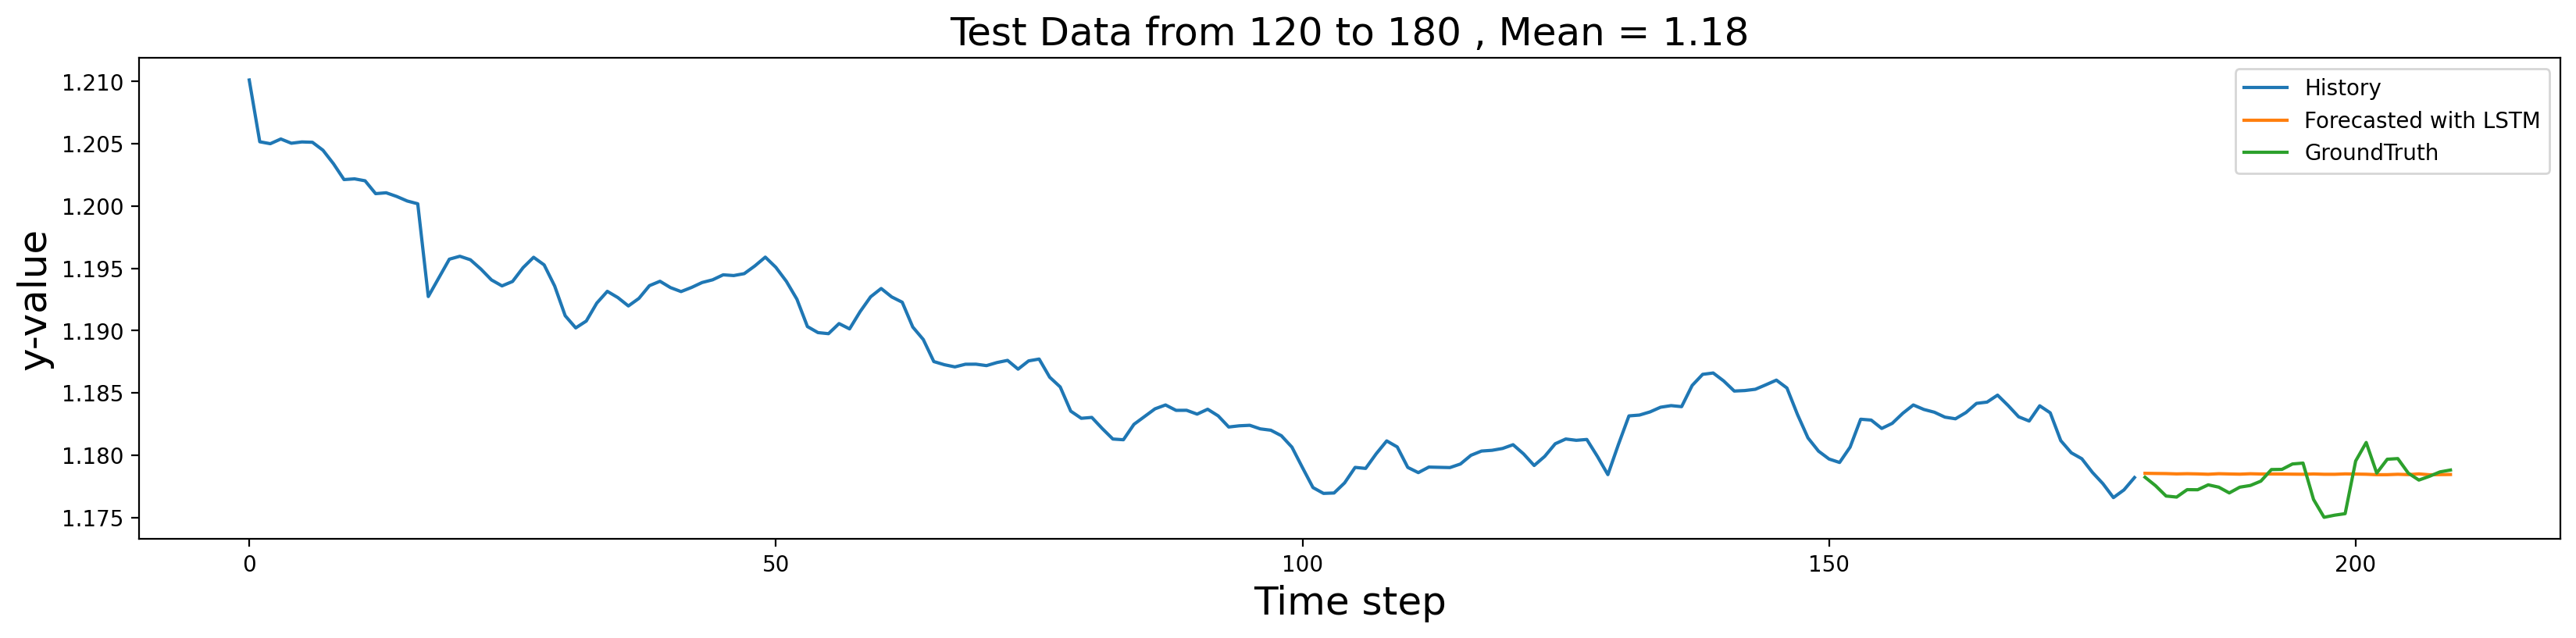

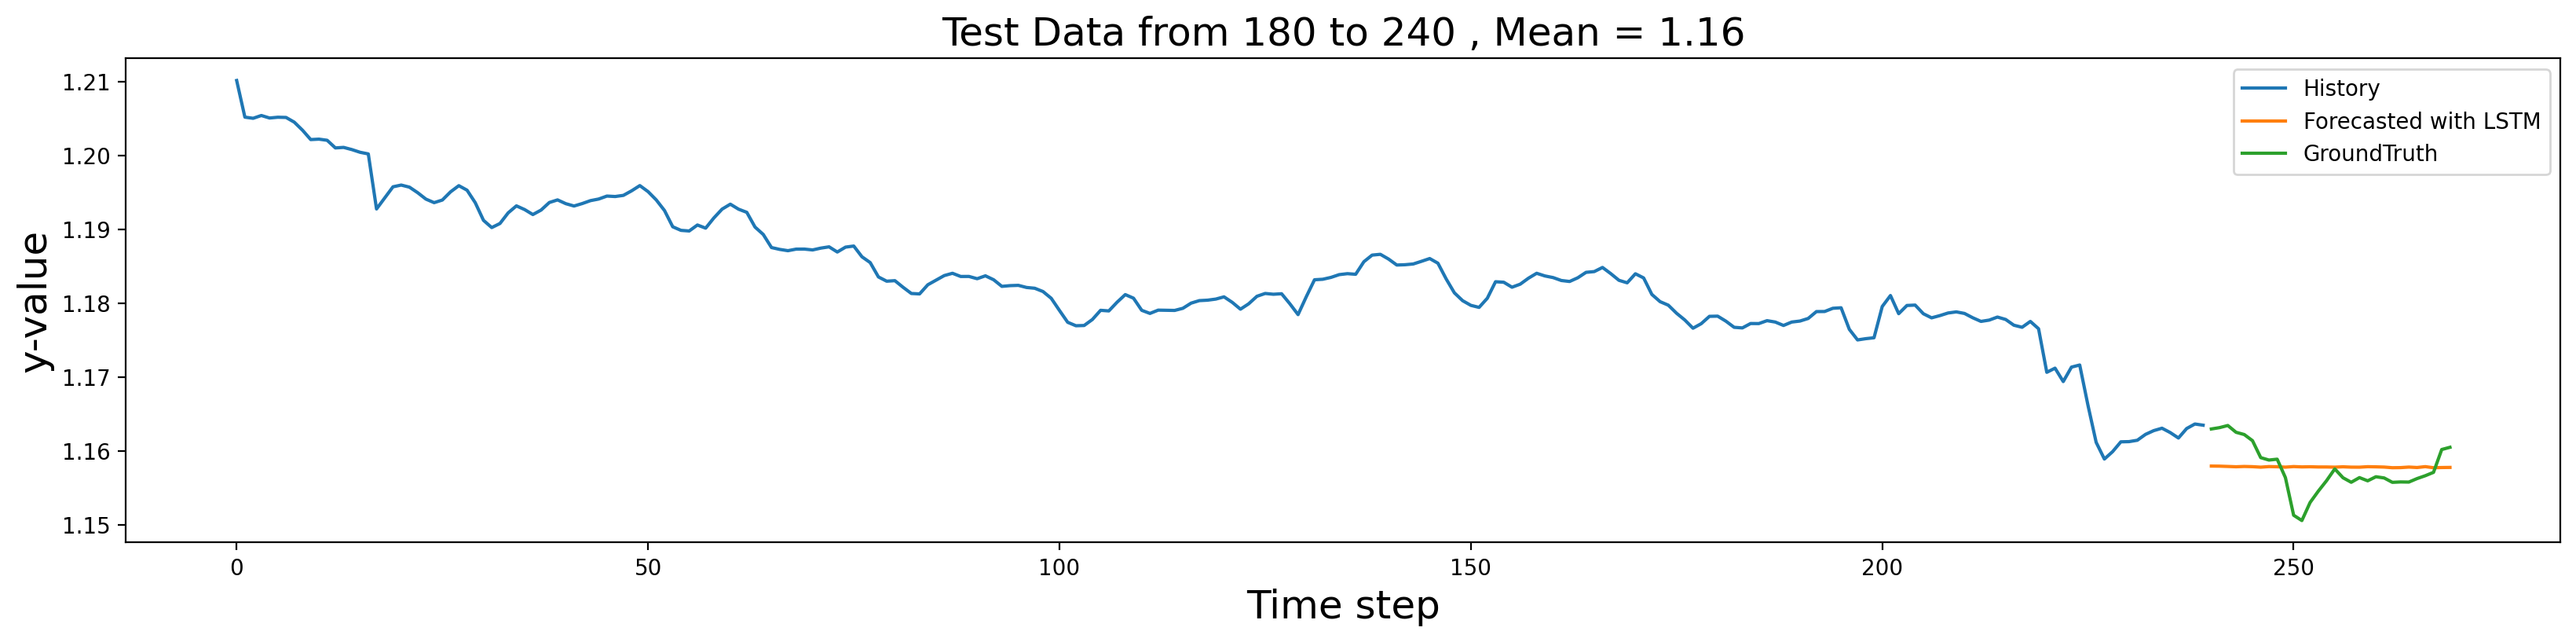

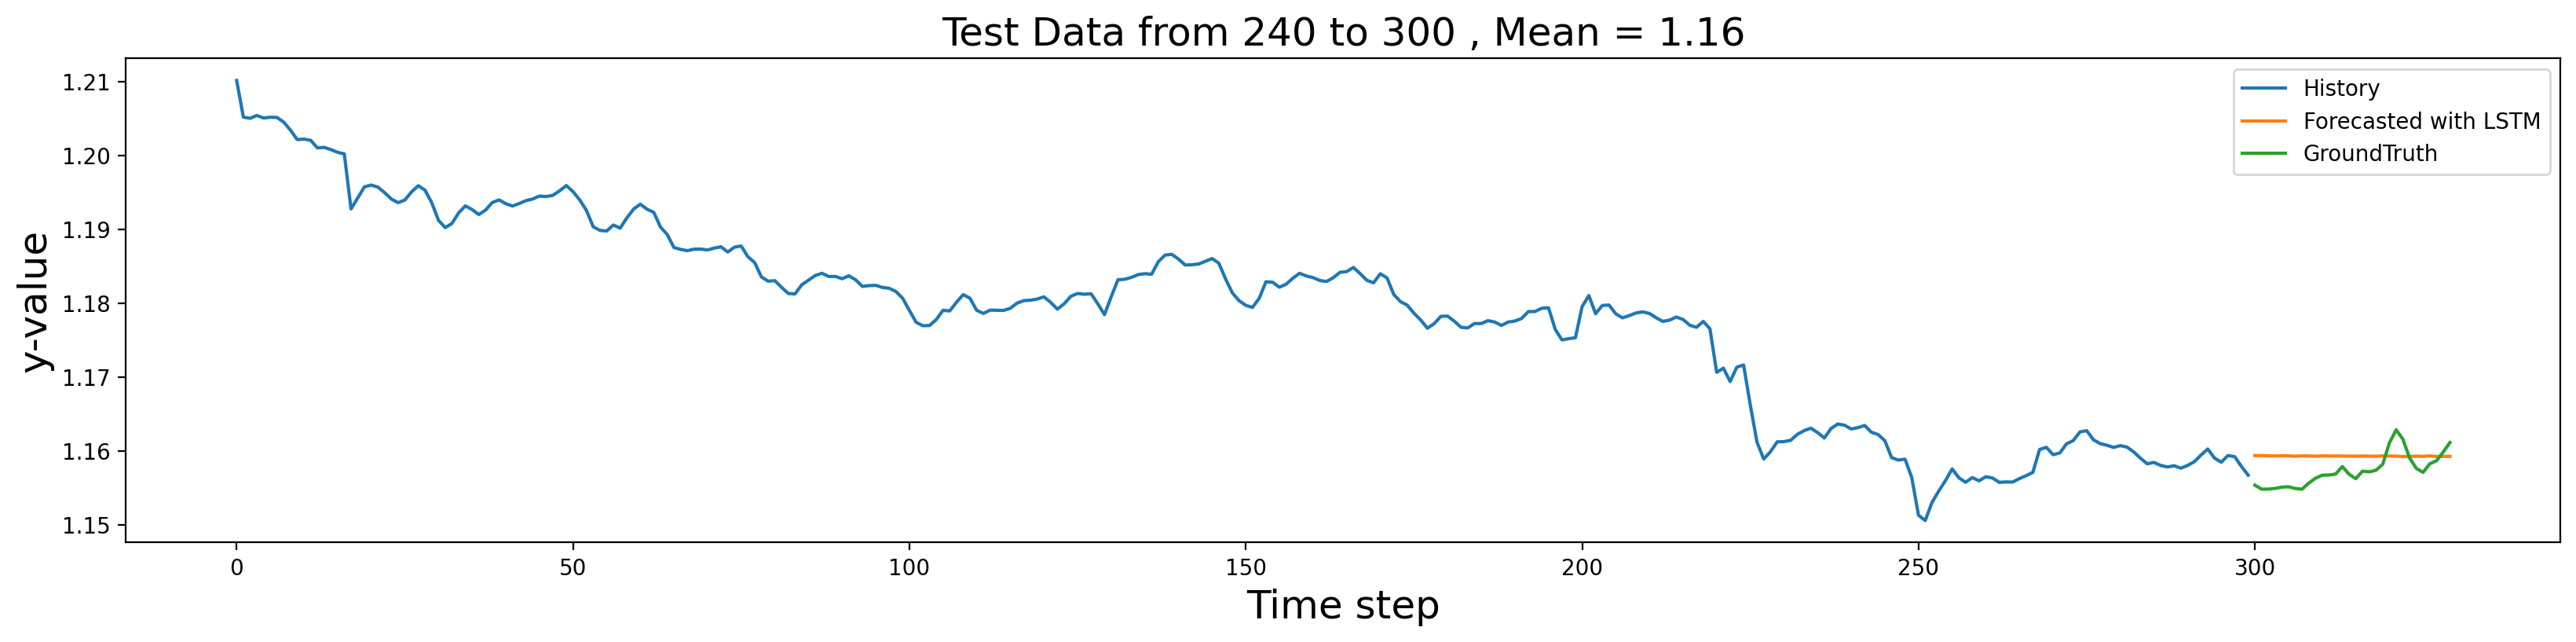

In [72]:
for i in range(120,300,60):
    start = i
    end = start + n_steps_in
    last = end + n_steps_out    
    y_pred_inv , dataset_test_y , past_data = prep_data(x1_test_scaled , x2_test_scaled , x3_test_scaled , x4_test_scaled , y_test , start , end , last)
    evaluate_prediction(y_pred_inv , dataset_test_y, 'LSTM' , start , end)
    plot_multistep(past_data , y_pred_inv , dataset_test_y , start , end)


Save & Load


In [ ]:
# model_url = '/Directory/Filename.h5'
# model.save(model_url)
# print("Saved")

In [ ]:
# model_url = '/Directory/Filename.h5'
# model = load_model(model_url)
# print("Loaded")
# model.summary()